# Linear Regression With Univariate

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading dataset

In [2]:
data = pd.read_excel('Concrete_Dataset.xls')

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Taking x, y values and plotting them on graph

Text(0, 0.5, 'Concrete compressive strength(MPa, megapascals)')

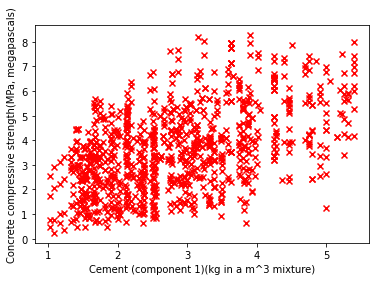

In [4]:
x = data['Cement (component 1)(kg in a m^3 mixture)'].values/100
y = data['Concrete compressive strength(MPa, megapascals) '].values/10
plt.scatter(x, y, marker='x', color='red')
plt.xlabel('Cement (component 1)(kg in a m^3 mixture)') 
plt.ylabel('Concrete compressive strength(MPa, megapascals)') 

## Cost Function

<img src="Cost_Function.png">

In [5]:
def cost_function(X, Y, theta):
    return np.sum(np.square(np.matmul(X, theta) - Y)) / (2 * len(Y))

## Regularized Cost Function

<img src="Regularized_Cost_Function.jpg">

In [6]:
def regularized_cost_function(X, Y, theta, regularizationParameter):
    temp = (regularizationParameter*np.sum(np.square(np.matmul(theta,theta))))
    return np.sum((np.square(np.matmul(X, theta) - Y)) +  temp) / (2 * len(Y))

#### So Now we have to get theta which minimizes cost function
## Gradient Decent Function

<img src="Gradient_Decent_Function.png">

In [7]:
def gradient_decent_function(X, Y, alpha, iterations):
    theta = np.zeros(2)
    m = len(Y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha/m) * np.sum(np.matmul(X, theta) - Y)
        t1 = theta[1] - (alpha/m) * np.sum((np.matmul(X, theta) - Y) * X[:,1])
        theta = np.array([t0, t1])
        
    return theta

## Regularized Gradient Decent Function

<img src="Regularized_Gradient_Decent_Function.jpg" width="500" height="600">

In [8]:
def regularization_gradient_decent_function(X, Y, alpha, iterations, regularizationParameter):
    theta = np.zeros(2)
    m = len(Y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha/m) * np.sum(np.matmul(X, theta) - Y)
        t1 = theta[1] - (alpha/m) * (np.sum((np.matmul(X, theta) - Y) * X[:,1]) + regularizationParameter*theta[1])
        theta = np.array([t0, t1])
        
    return theta

### Getting theta values from Gradient Decent Function

In [9]:
iterations = 10000
alpha = 0.1
X = np.column_stack((np.ones(len(x)), x))
Y = y
theta = gradient_decent_function(X, Y, alpha, iterations)
regularizationParameter = 10
regularizationTheta = regularization_gradient_decent_function(X, Y, alpha, iterations, regularizationParameter);
print("theta: ", theta)
print("regularizationTheta: ", regularizationTheta)
print("cost: ", cost_function(X, Y, theta))

theta:  [1.34427949 0.79579573]
regularizationTheta:  [1.36401322 0.78877719]
cost:  1.0485476028535796


### Plotting required line on the graph

cost:  1.0485476028535796


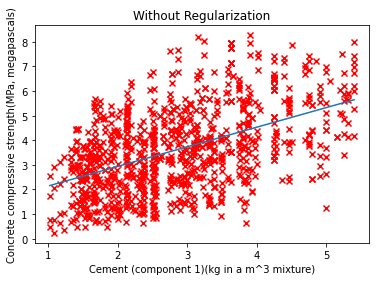

In [10]:
plt.scatter(x, y, marker='x', color='red')
samples = np.linspace(min(x), max(x))
plt.plot(samples, theta[0] + theta[1] * samples)
plt.title('Without Regularization')
plt.xlabel('Cement (component 1)(kg in a m^3 mixture)') 
plt.ylabel('Concrete compressive strength(MPa, megapascals)') 
print("cost: ", cost_function(X, Y, theta))

cost:  1.0485744769673269


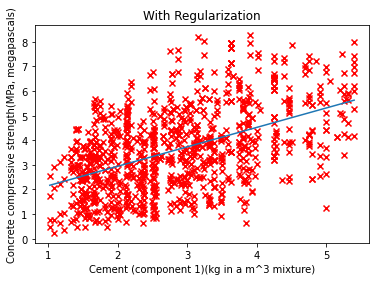

In [11]:
plt.scatter(x, y, marker='x', color='red')
samples = np.linspace(min(x), max(x))
plt.plot(samples, regularizationTheta[0] + regularizationTheta[1] * samples)
plt.title('With Regularization')
plt.xlabel('Cement (component 1)(kg in a m^3 mixture)') 
plt.ylabel('Concrete compressive strength(MPa, megapascals)') 
print("cost: ", cost_function(X, Y, regularizationTheta))

## Predicting Values

In [12]:
print("Enter Cement (component 1)(kg in a m^3 mixture)")
n = float(input())/100
print('Concrete compressive strength(MPa, megapascals) =', (theta[0] + theta[1] * n)*10)

Enter Cement (component 1)(kg in a m^3 mixture)
148.5
Concrete compressive strength(MPa, megapascals) = 25.260361511189288
